In [2]:
import numpy as np
import matplotlib.pyplot as plt

###Q1)

In [3]:
def L(a,b,c,w):
  return(a/2*w*w + b*w + c)

In [4]:
coeff = np.array([[1,0,0],[0.1,0,0],[10,0,0],[1,0,10],[1,1,1],[0.1,-1,-1]])

In [5]:
w_str = np.array([0,0,0,0,-1,10])
L_str = np.empty((0))
for i in range(len(coeff)):
  [a,b,c] = coeff[i,:]
  L_str = np.append(L_str,np.array([L(a,b,c,w_str[i])]))

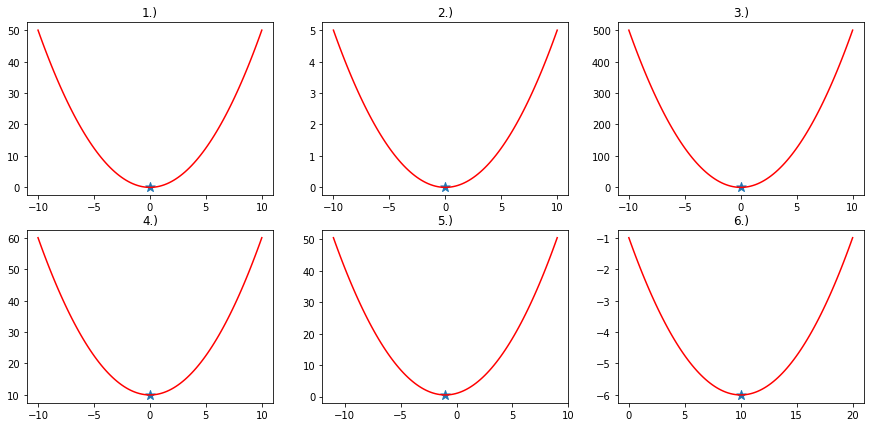

In [6]:
fig,ax = plt.subplots(2,3,figsize=(15,7))
for i in range(len(coeff)):
  [a,b,c] = coeff[i,:]
  xx = np.linspace(w_str[i]-10,w_str[i]+10,100)
  yy = [L(a,b,c,x) for x in xx]
  ax[i//3,i%3].plot(xx,yy,c='red')
  ax[i//3,i%3].scatter(w_str[i],L_str[i],marker='*',s=100)
  ax[i//3,i%3].set(title = f"{i+1}.)")

###Q2)

$L(w) = \frac{aw^2}{2} + bw + c$

$\frac{dL(w)}{dw} = aw + b$

In [7]:
def grad(a,b,c,w):
  return(a*w+b)

In [8]:
time = [10,100,1000]

For what $\alpha$ does it keep on oscillating periodically

$w_{t+1}-w_{\star} = w_{\star}-w_{t} - (1)$

$w_{t+1} = w_t - \alpha  \frac{dL}{dw} - (2)$

####1) $\alpha = \frac{2}{a}$

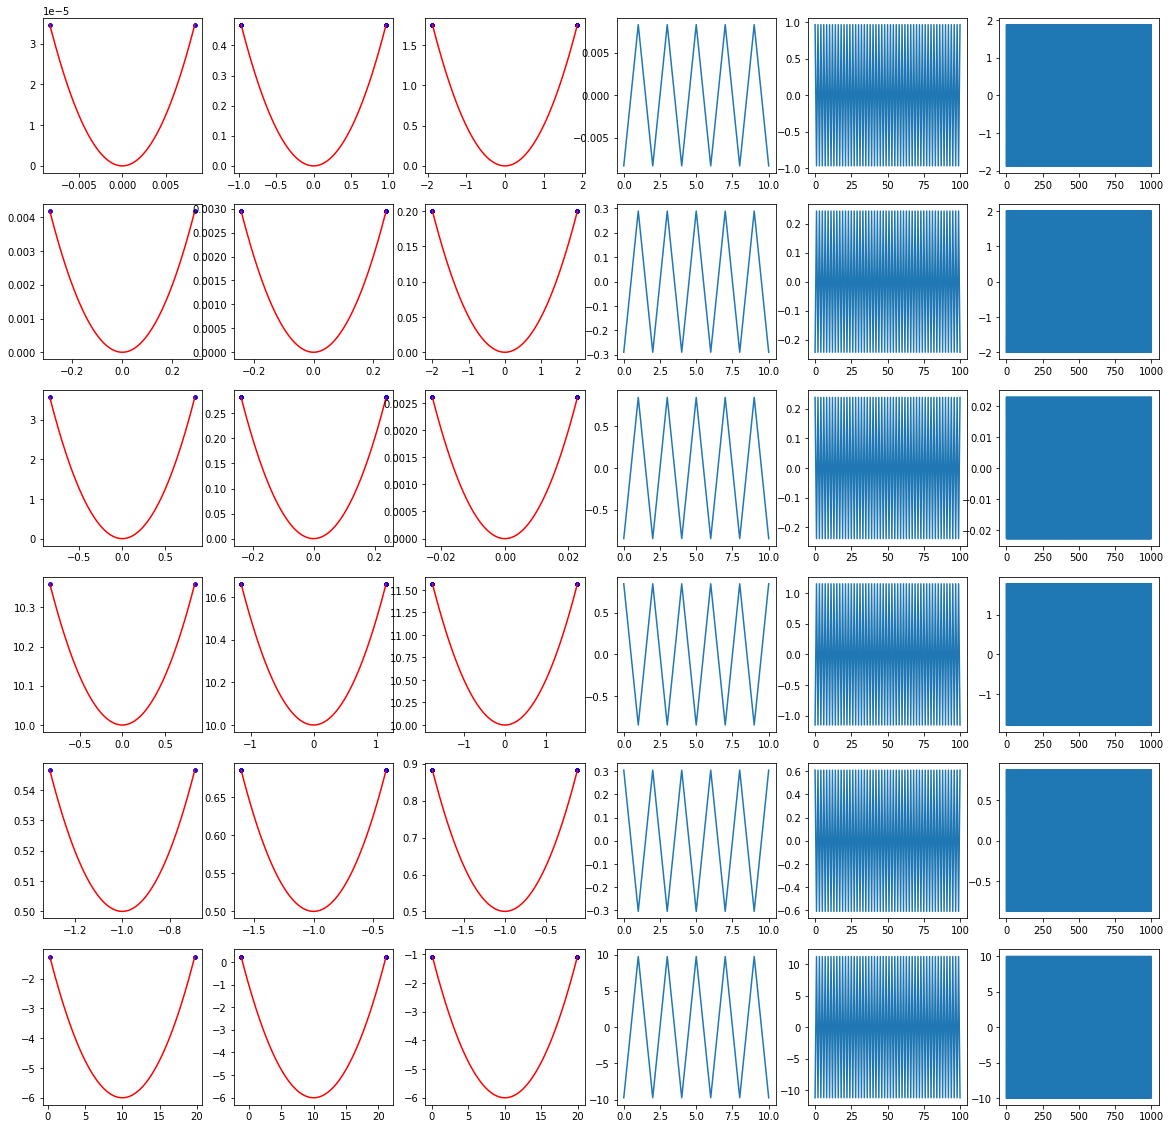

In [9]:
fig,ax = plt.subplots(6,6,figsize=(20,20))
for i in range(len(coeff)):
  for j in range(3):
    T = time[j]
    [a,b,c] = coeff[i,:]
    hist = []
    w = np.random.randn()
    hist.append(w)
    alpha = 2/a
    for t in range(T):
      if(w>1e10):
        break
      ax[i,j].scatter(w,L(a,b,c,w),c='blue',marker='.')
      w = w - alpha*grad(a,b,c,w)
      hist.append(w)
    rg = max(abs(w_str[i]-max(hist)),abs(w_str[i]-min(hist)))
    xx = np.linspace(w_str[i] - rg,w_str[i] + rg,100)
    yy = [L(a,b,c,x) for x in xx]
    ax[i,j].plot(xx,yy,c='red')
    ax[i,3+j].plot([i for i in range(len(hist))],hist - w_str[i])

In [10]:
eps = 0.01

Oscillates and Converges 
####1) $\alpha = \frac{2}{a} - \epsilon$

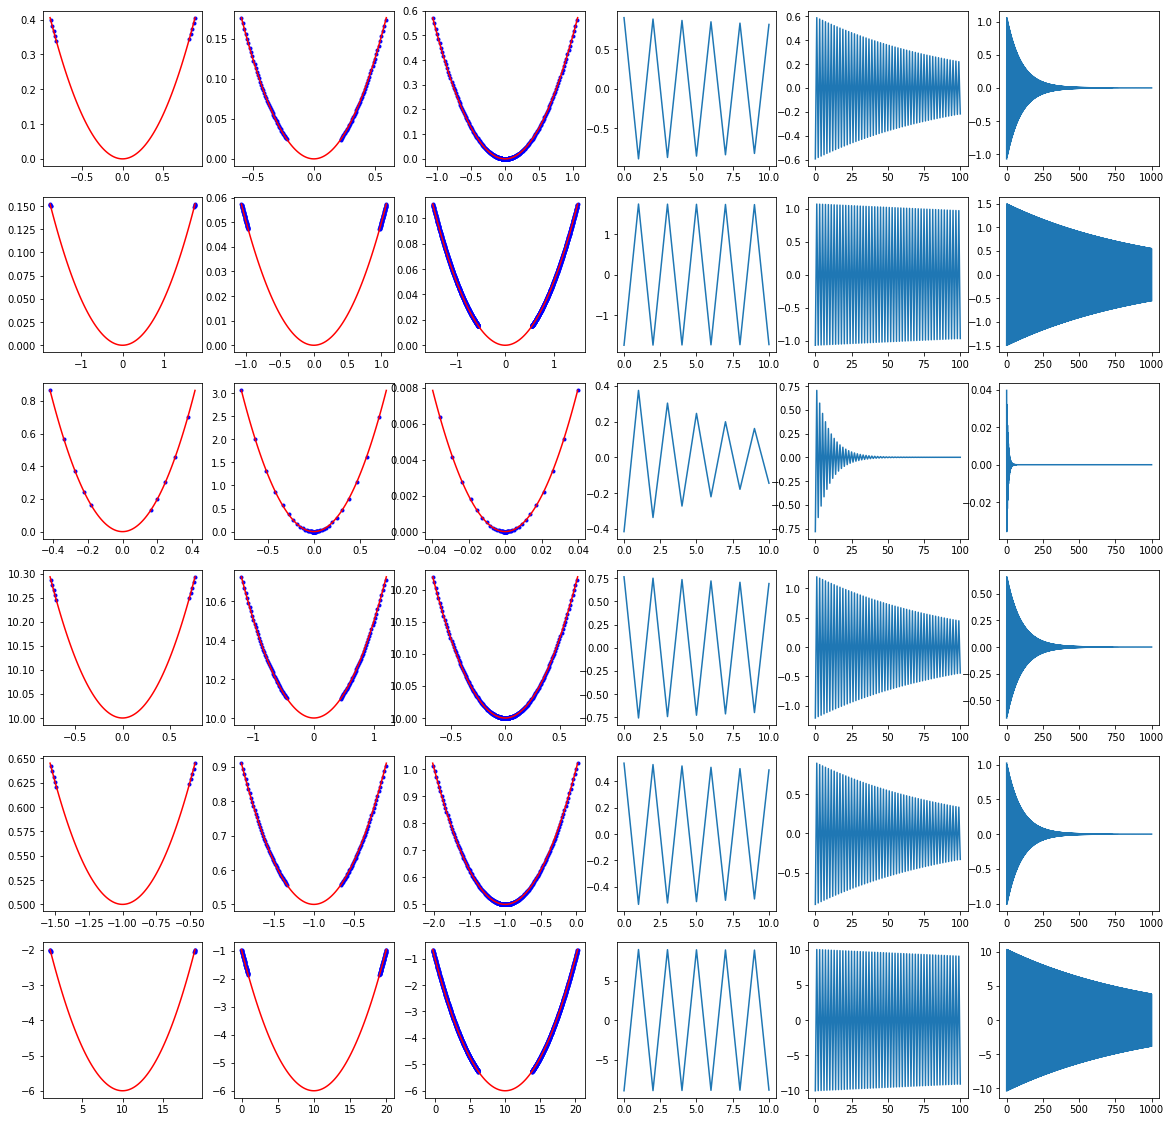

In [11]:
fig,ax = plt.subplots(6,6,figsize=(20,20))
for i in range(len(coeff)):
  for j in range(3):
    T = time[j]
    [a,b,c] = coeff[i,:]
    hist = []
    w = np.random.randn()
    hist.append(w)
    alpha = 2/a - eps
    for t in range(T):
      if(w>1e10):
        break
      ax[i,j].scatter(w,L(a,b,c,w),c='blue',marker='.')
      w = w - alpha*grad(a,b,c,w)
      hist.append(w)
    rg = max(abs(w_str[i]-max(hist)),abs(w_str[i]-min(hist)))
    xx = np.linspace(w_str[i] - rg,w_str[i] + rg,100)
    yy = [L(a,b,c,x) for x in xx]
    ax[i,j].plot(xx,yy,c='red')
    ax[i,3+j].plot([i for i in range(len(hist))],hist - w_str[i])

Oscillates and Diverges
####3) $\alpha = \frac{2}{a} + \epsilon$

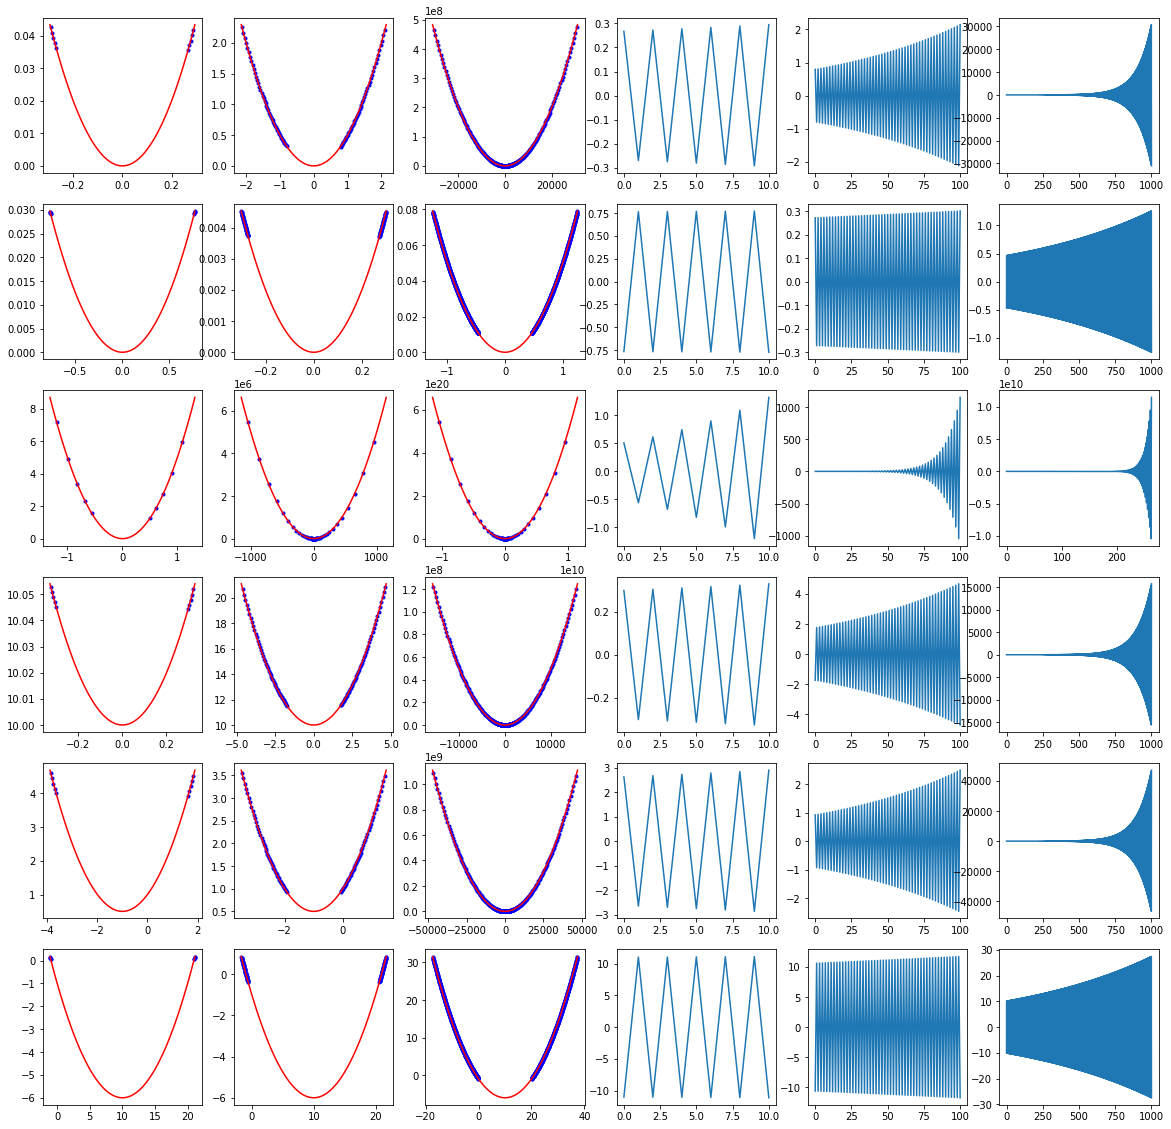

In [12]:
fig,ax = plt.subplots(6,6,figsize=(20,20))
for i in range(len(coeff)):
  for j in range(3):
    T = time[j]
    [a,b,c] = coeff[i,:]
    hist = []
    w = np.random.randn()
    hist.append(w)
    alpha = 2/a + eps
    for t in range(T):
      if(w>1e10):
        break
      ax[i,j].scatter(w,L(a,b,c,w),c='blue',marker='.')
      w = w - alpha*grad(a,b,c,w)
      hist.append(w)
    rg = max(abs(w_str[i]-max(hist)),abs(w_str[i]-min(hist)))
    xx = np.linspace(w_str[i] - rg,w_str[i] + rg,100)
    yy = [L(a,b,c,x) for x in xx]
    ax[i,j].plot(xx,yy,c='red')
    ax[i,3+j].plot([i for i in range(len(hist))],hist - w_str[i])

###Q3)

In [13]:
def f(x):
  return(4*x**4+9*x**3+3*x**2-0.5*x)
def df(x):
  return(16*x**3+27*x**2+6*x-0.5)

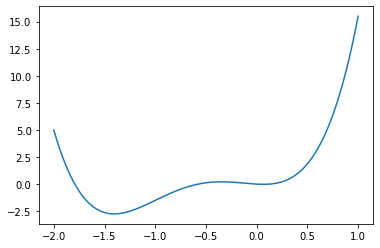

In [14]:
xx = np.linspace(-2,1,1000)
yy = [f(i) for i in xx]
plt.plot(xx,yy)
plt.show()

####1) GD without momentum

(-3.0, 15.0)

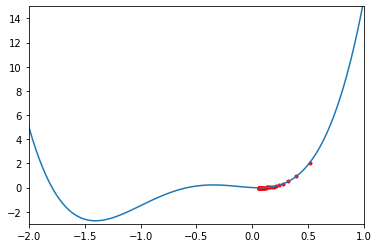

In [15]:
t = 1000
w = 1#np.random.randn()
alpha = 0.01
hist = []
for i in range(t):
  hist.append(w)
  w = w - alpha*df(w)
  plt.scatter(w,f(w),c='red',marker='.')
xx = np.linspace(-2,1,100)
yy = [f(x) for x in xx]
plt.plot(xx,yy)
plt.xlim(-2,1)
plt.ylim(-3,15)

####2) GD with momentum

(-3.0, 15.0)

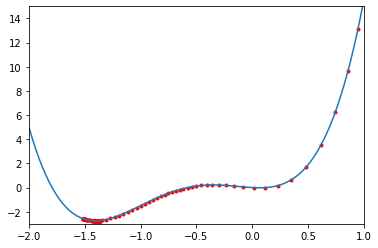

In [16]:
t = 1000
w = 1 #np.random.randn()
v = np.random.randn()
alpha = 0.01
beta = 0.9
hist = []
for i in range(t):
  hist.append(w)
  v = beta*v + (1-beta)*df(w)
  w = w - alpha*v
  plt.scatter(w,f(w),c='red',marker='.')
xx = np.linspace(-2,1,100)
yy = [f(x) for x in xx]
plt.plot(xx,yy)
plt.xlim(-2,1)
plt.ylim(-3,15)

###Q4)

In [17]:
c = np.array([[1/2,1/2,0,0,0],[10/2,1/2,0,0,0],[1/2,10/2,0,0,0],[1/2,1/2,5,-3,-2]])
def f(i,w1,w2):
  return( c[i,0]*w1**2 +  c[i,1]*w2**2 +  c[i,2]*w1 + c[i,3]*w2 + c[i,4]  )
def dw1(i,w1):
  return(2*c[i,0]*w1+c[i,2])
def dw2(i,w2):
  return(2*c[i,1]*w2+c[i,3])

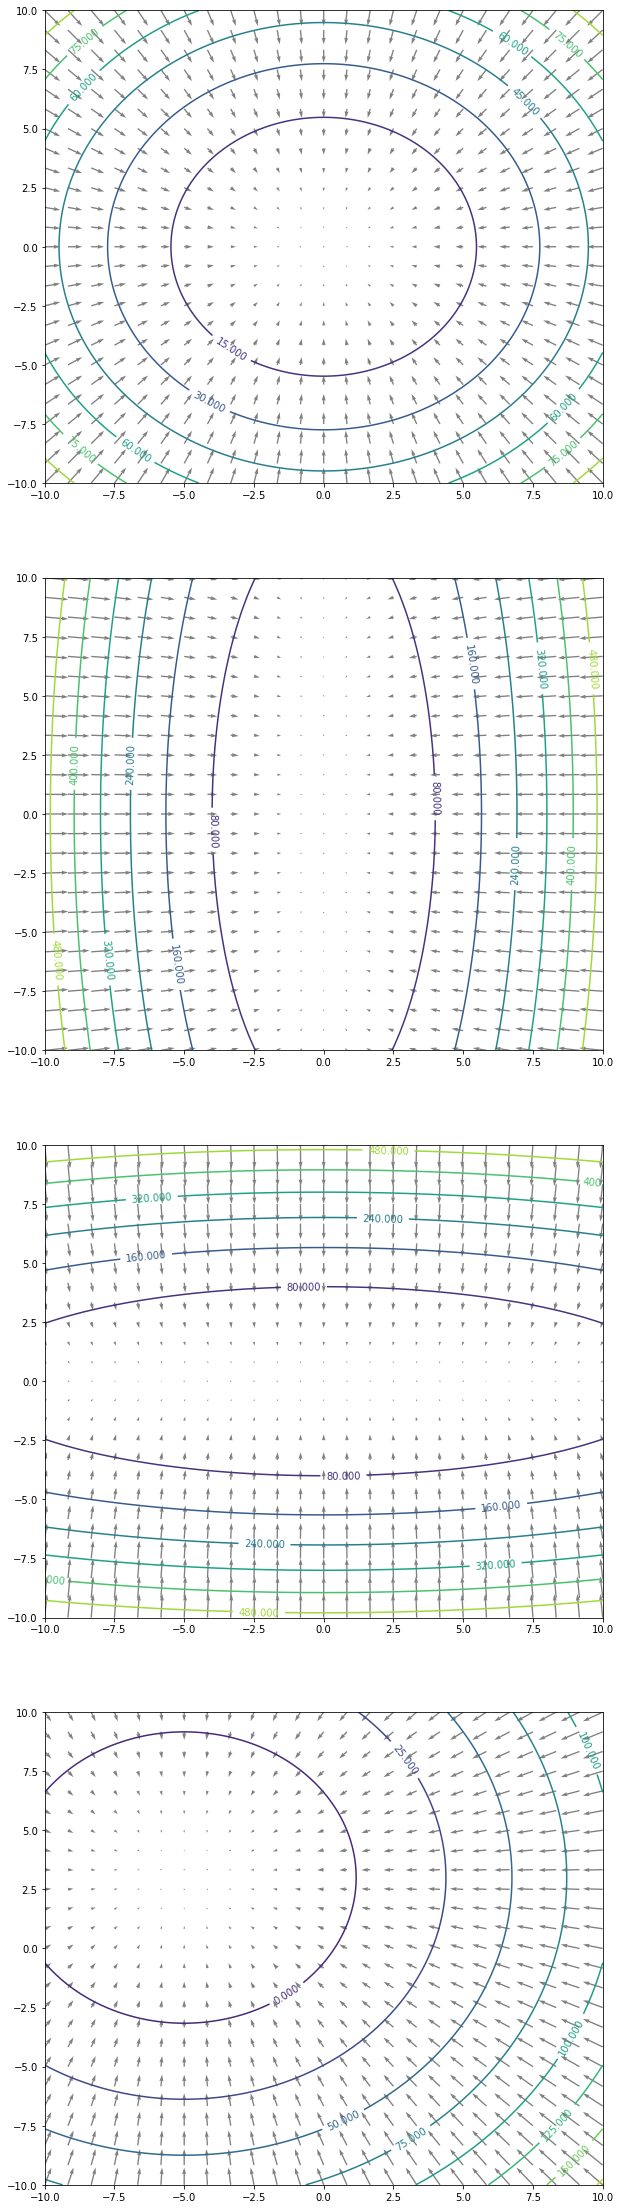

In [20]:
fig,ax = plt.subplots(4,1,figsize=(10,40))
for i in range(4):
  xx = np.linspace(-10,10,100)
  yy = np.linspace(-10,10,100)
  X,Y = np.meshgrid(xx,yy)
  Z = f(i,X,Y)
  cp = ax[i].contour(X, Y, Z)
  xx = np.linspace(-10,10,25)
  yy = np.linspace(-10,10,25)
  X,Y = np.meshgrid(xx,yy)
  ax[i].clabel(cp, inline=True, fontsize=10)
  ax[i].quiver(X,Y,-dw1(i,X),-dw2(i,Y),units='xy',color='gray')

####(i)

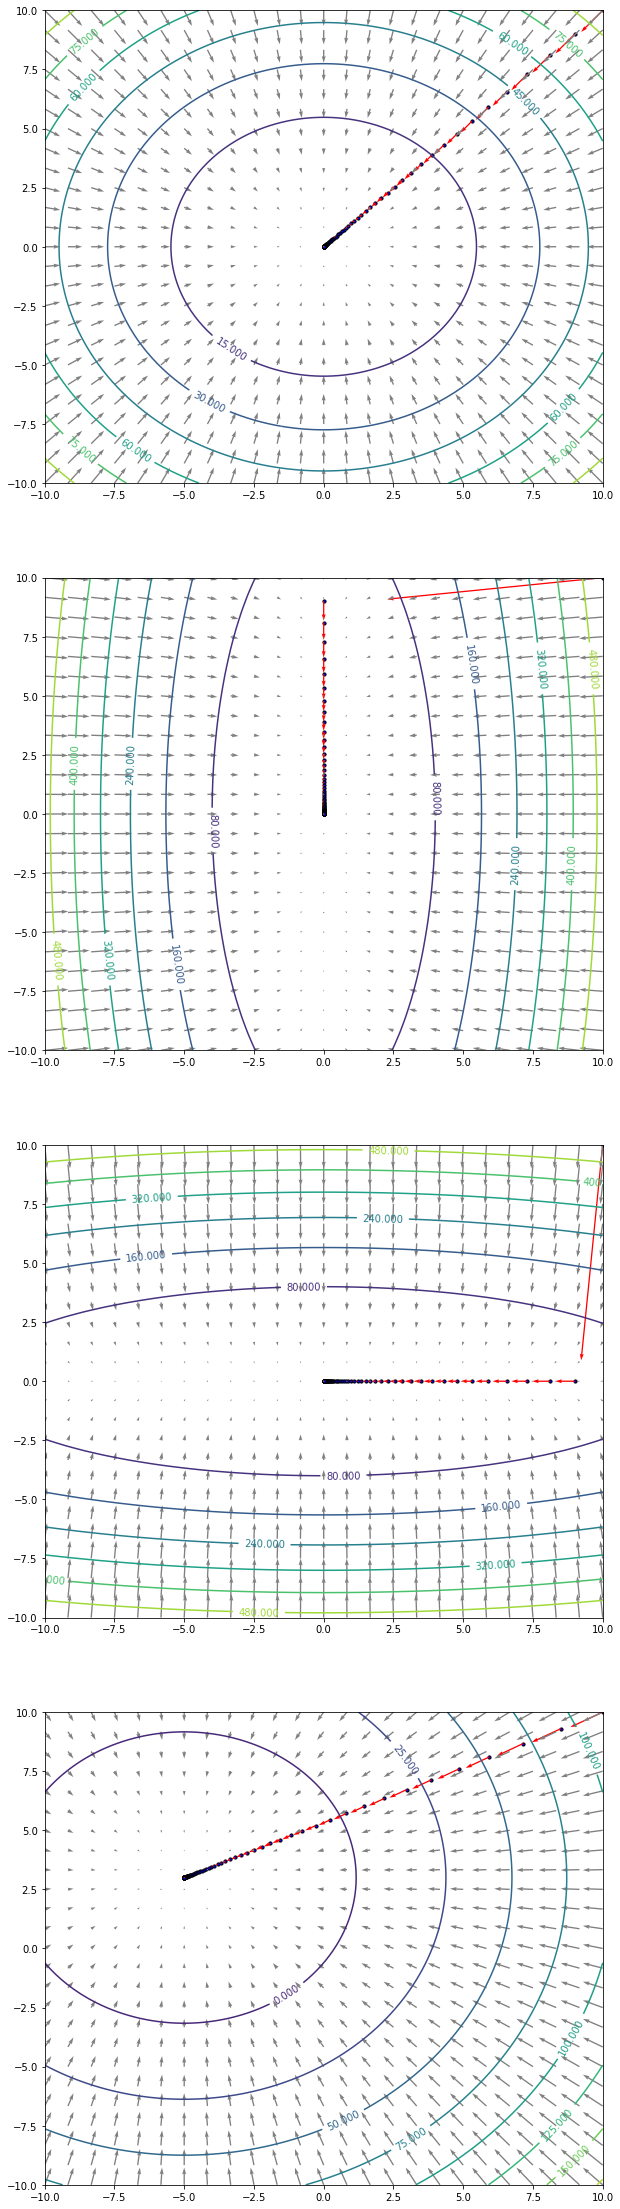

In [81]:
fig,ax = plt.subplots(4,1,figsize=(10,40))
for i in range(4):
  w1 = 10#np.random.randn()
  w2 = 10#np.random.randn()
  alpha = 0.1
  for t in range(100):
    ax[i].scatter(w1,w2,c='blue',ec='black',s=10)
    tmpw1 = w1
    tmpw2 = w2
    w1 = w1 - alpha*dw1(i,w1)
    w2 = w2 - alpha*dw2(i,w2)
    ax[i].quiver(tmpw1,tmpw2,w1-tmpw1,w2-tmpw2,units ='xy',color='red',width=0.05,scale=1.2)
  xx = np.linspace(-10,10,100)
  yy = np.linspace(-10,10,100)
  X,Y = np.meshgrid(xx,yy)
  Z = f(i,X,Y)
  cp = ax[i].contour(X, Y, Z)
  xx = np.linspace(-10,10,25)
  yy = np.linspace(-10,10,25)
  X,Y = np.meshgrid(xx,yy)
  ax[i].clabel(cp, inline=True, fontsize=10)
  ax[i].quiver(X,Y,-dw1(i,X),-dw2(i,Y),units='xy',color='gray')

####(ii) Perfect Oscillation in one coordinate (here x(w1))

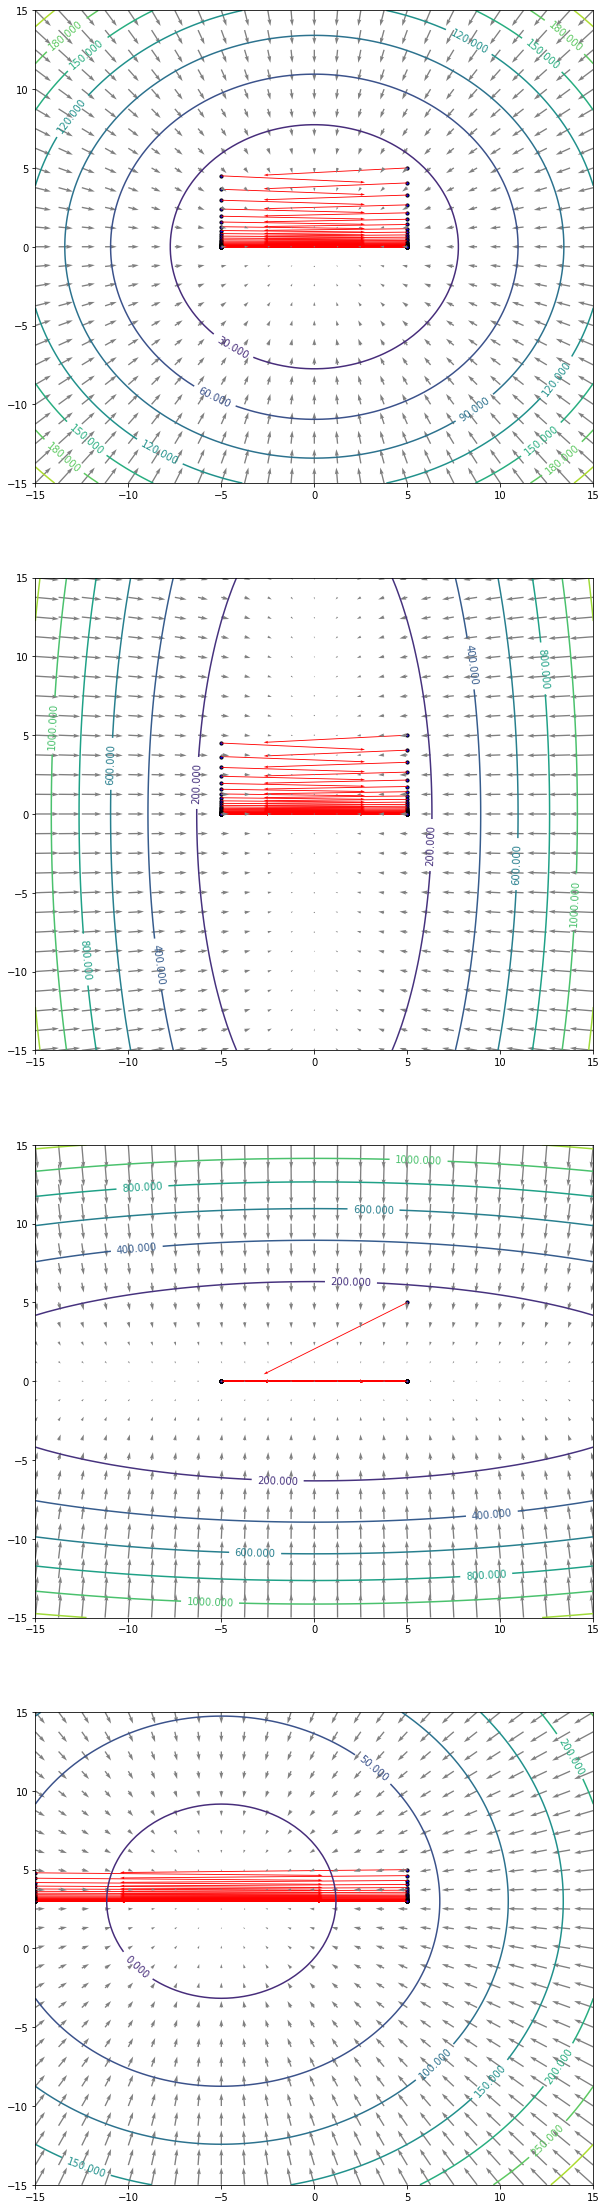

In [82]:
fig,ax = plt.subplots(4,1,figsize=(10,40))
for i in range(4):
  w1 = 5#np.random.randn()
  w2 = 5#np.random.randn()
  alpha1 = 1/c[i,0]
  alpha2 = 0.1
  for t in range(100):
    ax[i].scatter(w1,w2,c='blue',ec='black',s=10)
    tmpw1 = w1
    tmpw2 = w2
    w1 = w1 - alpha1*dw1(i,w1)
    w2 = w2 - alpha2*dw2(i,w2)
    ax[i].quiver(tmpw1,tmpw2,w1-tmpw1,w2-tmpw2,units ='xy',color='red',width=0.05,scale=1.2)
  xx = np.linspace(-15,15,100)
  yy = np.linspace(-15,15,100)
  X,Y = np.meshgrid(xx,yy)
  Z = f(i,X,Y)
  cp = ax[i].contour(X, Y, Z)
  xx = np.linspace(-15,15,25)
  yy = np.linspace(-15,15,25)
  X,Y = np.meshgrid(xx,yy)
  ax[i].clabel(cp, inline=True, fontsize=10)
  ax[i].quiver(X,Y,-dw1(i,X),-dw2(i,Y),units='xy',color='gray')

####(iii) First column convergence, Second Column Divergence 

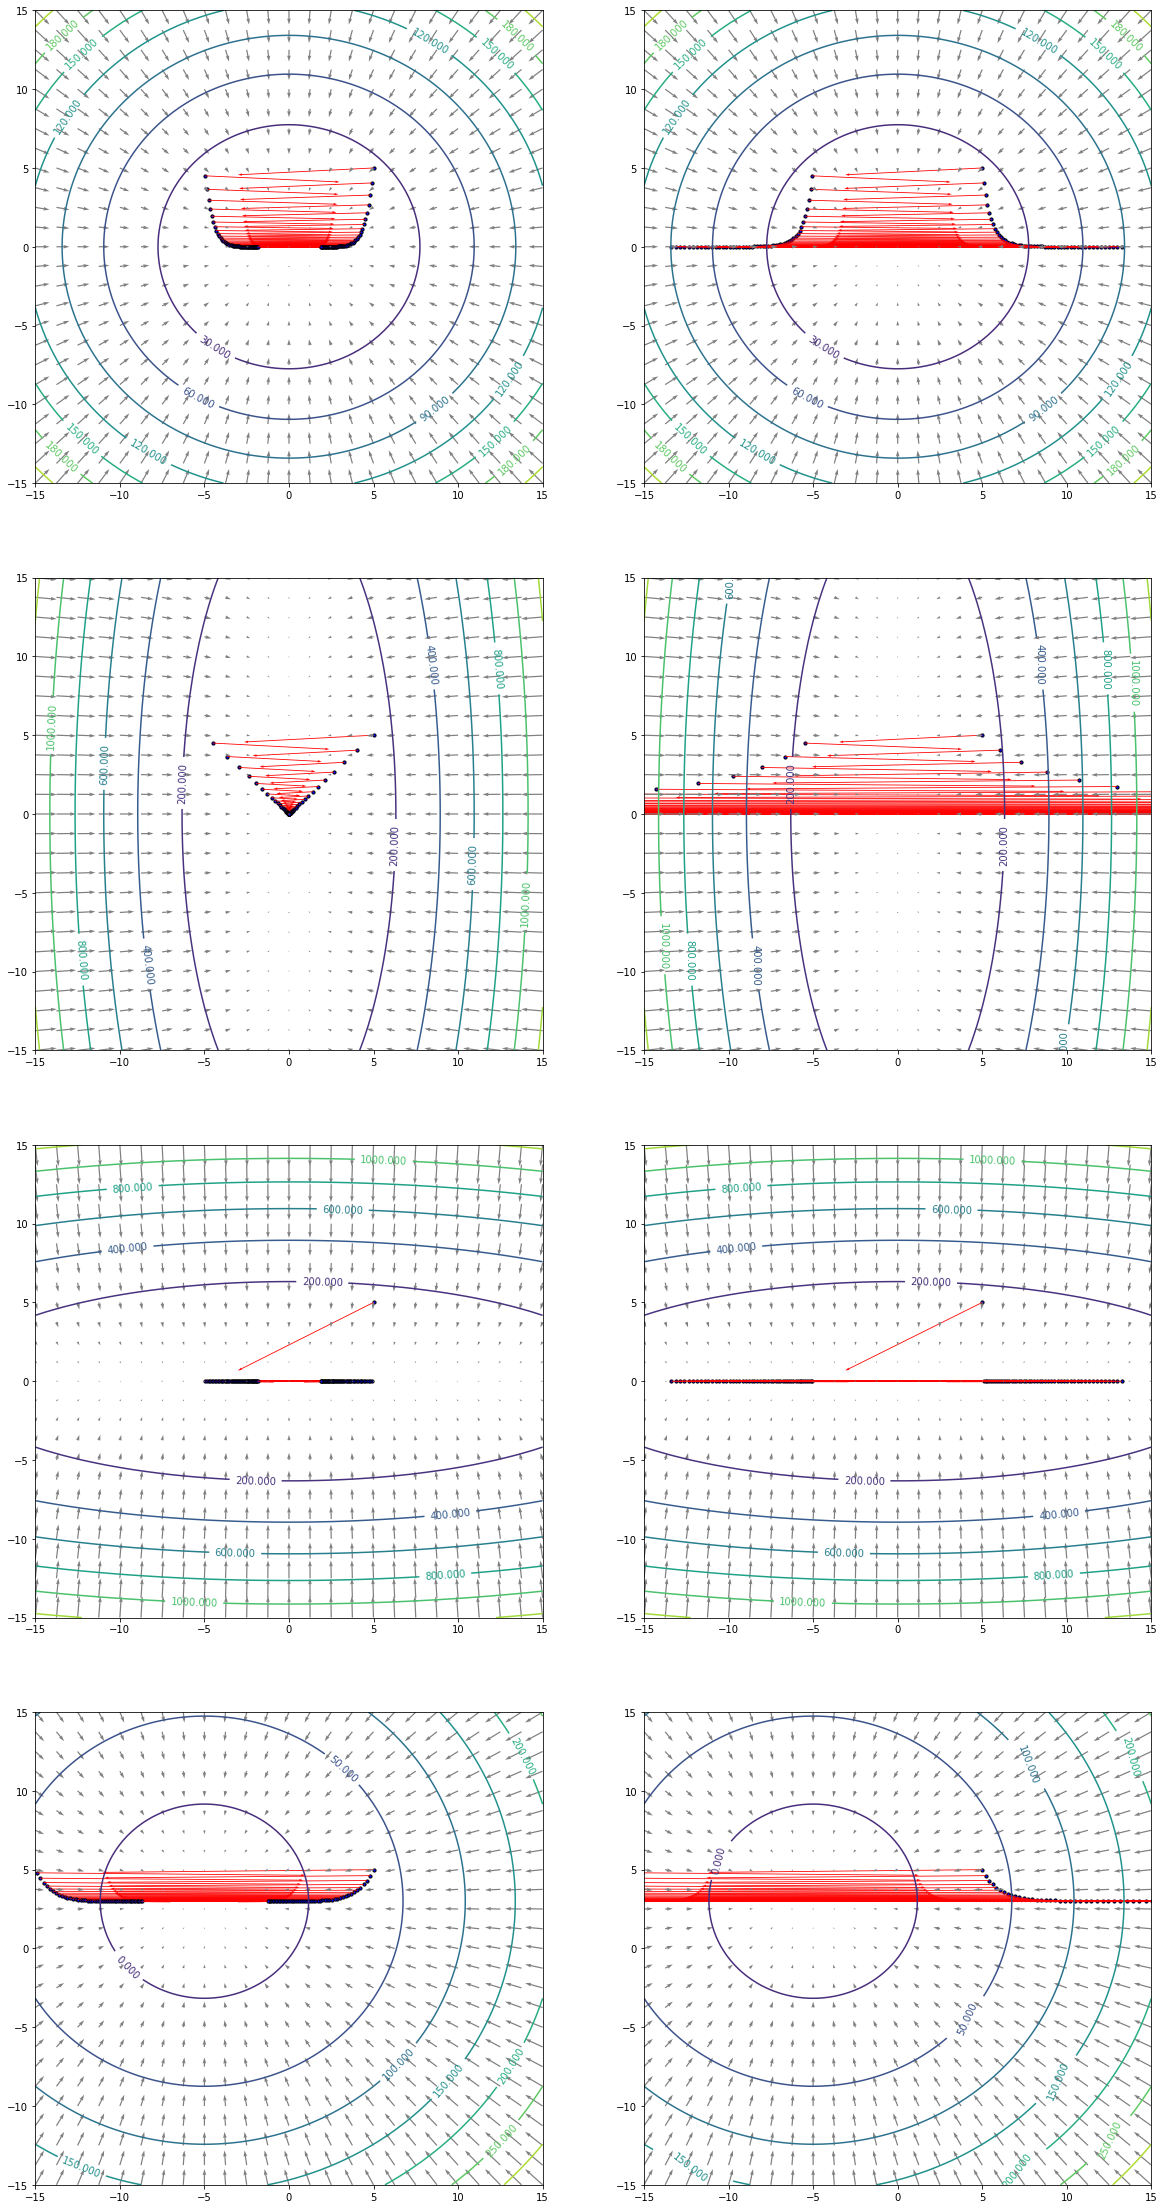

In [83]:
fig,ax = plt.subplots(4,2,figsize=(20,40))
for i in range(4):
  for j in range(2):
    w1 = 5#np.random.randn()
    w2 = 5#np.random.randn()
    alpha1 = 1/c[i,0] + eps*(2*(j%2)-1) # +epsilon and -epsilon case
    alpha2 = 0.1
    for t in range(100):
      ax[i,j].scatter(w1,w2,c='blue',ec='black',s=10)
      tmpw1 = w1
      tmpw2 = w2
      w1 = w1 - alpha1*dw1(i,w1)
      w2 = w2 - alpha2*dw2(i,w2)
      ax[i,j].quiver(tmpw1,tmpw2,w1-tmpw1,w2-tmpw2,units ='xy',color='red',width=0.05,scale=1.2)
    xx = np.linspace(-15,15,100)
    yy = np.linspace(-15,15,100)
    X,Y = np.meshgrid(xx,yy)
    Z = f(i,X,Y)
    cp = ax[i,j].contour(X, Y, Z)
    xx = np.linspace(-15,15,25)
    yy = np.linspace(-15,15,25)
    X,Y = np.meshgrid(xx,yy)
    ax[i,j].clabel(cp, inline=True, fontsize=10)
    ax[i,j].quiver(X,Y,-dw1(i,X),-dw2(i,Y),units='xy',color='gray')
    ax[i,j].set(xlim=(-15,15),ylim=(-15,15))